<a href="https://colab.research.google.com/github/aronpwong/lhl-transportationanalysis/blob/main/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import folium

In [4]:
#Load the dataframes
mta_ridership = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/lhl-finalproject/cleaned_data/mta_ridership.csv')
ny_census = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/lhl-finalproject/cleaned_data/ny_census.csv')
ny_stations = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/lhl-finalproject/cleaned_data/ny_stations.csv')
ny_subway = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/lhl-finalproject/cleaned_data/ny_subway.csv')
nyc_air = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/lhl-finalproject/cleaned_data/nyc_air.csv')
transportation_stats = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/lhl-finalproject/cleaned_data/transportation_stats_f.csv')
ny_pollution = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/lhl-finalproject/cleaned_data/usa_pollution_ny.csv')

In [5]:
print(mta_ridership.dtypes)

Date                                                        object
Subways: Total Estimated Ridership                           int64
Subways: % of Comparable Pre-Pandemic Day                  float64
Buses: Total Estimated Ridership                             int64
Buses: % of Comparable Pre-Pandemic Day                    float64
LIRR: Total Estimated Ridership                            float64
LIRR: % of Comparable Pre-Pandemic Day                     float64
Metro-North: Total Estimated Ridership                       int64
Metro-North: % of Comparable Pre-Pandemic Day              float64
Access-A-Ride: Total Scheduled Trips                         int64
Access-A-Ride: % of Comparable Pre-Pandemic Day            float64
Bridges and Tunnels: Total Traffic                           int64
Bridges and Tunnels: % of Comparable Pre-Pandemic Day      float64
Staten Island Railway: Total Estimated Ridership           float64
Staten Island Railway: % of Comparable Pre-Pandemic Day    flo

In [6]:
mta_ridership.describe()

,Subways: Total Estimated Ridership,Subways: % of Comparable Pre-Pandemic Day,Buses: Total Estimated Ridership,Buses: % of Comparable Pre-Pandemic Day,LIRR: Total Estimated Ridership,LIRR: % of Comparable Pre-Pandemic Day,Metro-North: Total Estimated Ridership,Metro-North: % of Comparable Pre-Pandemic Day,Access-A-Ride: Total Scheduled Trips,Access-A-Ride: % of Comparable Pre-Pandemic Day,Bridges and Tunnels: Total Traffic,Bridges and Tunnels: % of Comparable Pre-Pandemic Day,Staten Island Railway: Total Estimated Ridership,Staten Island Railway: % of Comparable Pre-Pandemic Day
count,1.621000e+03,1621.000000,1.621000e+03,1621.000000,1621.000000,1621.000000,1621.000000,1621.000000,1621.000000,1621.000000,1.621000e+03,1621.000000,1621.000000,1621.000000
mean,2.462661e+06,0.545645,9.969682e+05,0.542924,131509.341147,0.573282,111025.191240,0.494898,21391.657002,0.831055,8.507029e+05,0.929685,4340.813695,0.378112
std,1.053327e+06,0.198567,4.439239e+05,0.196737,69146.640021,0.285782,65018.176053,0.257258,7669.162991,0.240229,1.450276e+05,0.148839,2671.008094,0.183576
min,1.983990e+05,0.070000,5.498000e+03,0.010000,1903.000000,0.020000,3281.000000,0.030000,2506.000000,0.130000,1.567590e+05,0.180000,2.000000,0.000000
25%,1.690489e+06,0.390000,7.038920e+05,0.520000,76847.000000,0.350000,47292.000000,0.250000,15544.000000,0.700000,8.046540e+05,0.890000,2016.000000,0.250000
50%,2.399521e+06,0.600000,1.135694e+06,0.600000,120737.000000,0.580000,102668.000000,0.540000,21941.000000,0.820000,8.915740e+05,0.970000,4258.000000,0.400000
75%,3.397258e+06,0.690000,1.338822e+06,0.650000,192275.000000,0.740000,170716.000000,0.690000,26892.000000,1.000000,9.458470e+05,1.020000,6759.000000,0.460000
max,5.498809e+06,1.430000,2.244515e+06,1.260000,321569.000000,2.370000,242116.000000,1.930000,37800.000000,1.440000,1.043802e+06,1.200000,17453.000000,1.820000


In [7]:
print("MTA Ridership Description:")
print(mta_ridership.describe())

MTA Ridership Description:
       Subways: Total Estimated Ridership  \
count                        1.621000e+03   
mean                         2.462661e+06   
std                          1.053327e+06   
min                          1.983990e+05   
25%                          1.690489e+06   
50%                          2.399521e+06   
75%                          3.397258e+06   
max                          5.498809e+06   

       Subways: % of Comparable Pre-Pandemic Day  \
count                                1621.000000   
mean                                    0.545645   
std                                     0.198567   
min                                     0.070000   
25%                                     0.390000   
50%                                     0.600000   
75%                                     0.690000   
max                                     1.430000   

       Buses: Total Estimated Ridership  \
count                      1.621000e+03   
mean        

In [8]:
print(ny_census.dtypes)

Neighborhood                                                               object
Born in New York State                                                    float64
Car-free commute (% of commuters)                                         float64
Disabled population                                                       float64
FHAVA-backed home purchase loans (% of home purchase loans)               float64
                                                                           ...   
Students performing at grade level in math, 4th grade                     float64
Total housing code violations (per 1,000 privately owned rental units)    float64
Unemployment rate                                                         float64
Units authorized by new residential building permits                        int64
Units issued new certificates of occupancy                                  int64
Length: 87, dtype: object


In [9]:
ny_census.describe()

,Born in New York State,Car-free commute (% of commuters),Disabled population,FHAVA-backed home purchase loans (% of home purchase loans),Foreign-born population,Higher-cost home purchase loans (% of home purchase loans),Higher-cost refinance loans (% of refinance loans),"Home purchase loan rate (per 1,000 properties)",Home purchase loans in LMI tracts (% of home purchase loans),Home purchase loans to LMI borrowers (% of home purchase loans),...,Severely rent-burdened households,"Severely rent-burdened households, low income","Severely rent-burdened households, moderate income",Single-person households,"Students performing at grade level in English language arts, 4th grade","Students performing at grade level in math, 4th grade","Total housing code violations (per 1,000 privately owned rental units)",Unemployment rate,Units authorized by new residential building permits,Units issued new certificates of occupancy
count,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,...,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000
mean,48.388136,70.991525,8.452542,13.393220,36.030508,4.564407,1.966102,19.996610,8.069492,38.732203,...,29.857627,47.598305,3.776271,31.898305,45.020339,42.333898,253.359322,6.896949,363.440678,435.677966
std,9.595924,16.416059,4.522334,18.456976,11.864032,4.619142,1.629323,6.407349,6.730944,32.933964,...,6.325515,7.346228,7.160580,9.972038,17.132232,18.767531,188.350226,3.669568,332.546511,613.936912
min,30.900000,26.500000,1.700000,0.000000,16.500000,0.000000,0.000000,9.500000,0.100000,0.000000,...,16.800000,29.400000,0.000000,13.600000,19.300000,12.100000,16.700000,2.100000,1.000000,0.000000
25%,41.600000,63.050000,5.800000,0.050000,25.850000,0.350000,0.950000,16.150000,2.650000,7.600000,...,25.400000,43.600000,0.000000,25.550000,30.950000,26.350000,104.450000,4.745000,141.000000,85.500000
50%,48.100000,75.200000,6.800000,2.300000,34.000000,2.800000,1.700000,19.800000,6.700000,35.500000,...,30.500000,46.500000,0.600000,31.000000,42.600000,40.400000,172.800000,5.770000,239.000000,222.000000
75%,53.250000,83.800000,10.000000,27.000000,44.250000,7.550000,2.500000,22.500000,12.050000,60.850000,...,33.850000,50.850000,3.150000,35.350000,55.400000,57.900000,411.350000,8.215000,505.500000,516.500000
max,78.500000,90.900000,20.900000,60.600000,63.900000,16.400000,7.100000,37.100000,27.400000,100.000000,...,45.600000,65.400000,26.900000,59.400000,82.900000,83.200000,705.900000,20.750000,1364.000000,2817.000000


In [10]:
print("NY Census Description:")
print(ny_census.describe())

NY Census Description:
       Born in New York State  Car-free commute (% of commuters)  \
count               59.000000                          59.000000   
mean                48.388136                          70.991525   
std                  9.595924                          16.416059   
min                 30.900000                          26.500000   
25%                 41.600000                          63.050000   
50%                 48.100000                          75.200000   
75%                 53.250000                          83.800000   
max                 78.500000                          90.900000   

       Disabled population  \
count            59.000000   
mean              8.452542   
std               4.522334   
min               1.700000   
25%               5.800000   
50%               6.800000   
75%              10.000000   
max              20.900000   

       FHAVA-backed home purchase loans (% of home purchase loans)  \
count                  

In [11]:
print(ny_stations.dtypes)

remote         object
booth          object
complex_id    float64
station        object
line_name      object
division       object
dtype: object


In [12]:
ny_stations.describe()

,complex_id
count,776.000000
mean,328.744845
std,193.624490
min,1.000000
25%,168.000000
50%,312.000000
75%,458.250000
max,636.000000


In [13]:
# Frequency distribution of stations
station_frequency = ny_stations['station'].value_counts()
print("Frequency Distribution of Stations:")
print(station_frequency)

Frequency Distribution of Stations:
station
34 ST-PENN STA     14
FULTON ST          12
86 ST              10
42 ST-TIMES SQ      9
23 ST               9
                   ..
WILSON AVE          1
163 ST-AMSTERDM     1
BROADWAY            1
YORK ST             1
BEACH 67 ST         1
Name: count, Length: 399, dtype: int64


In [16]:
print("NY Stations Description:")
print(ny_stations.describe())

NY Stations Description:
       complex_id
count  776.000000
mean   328.744845
std    193.624490
min      1.000000
25%    168.000000
50%    312.000000
75%    458.250000
max    636.000000


In [17]:
# Calculate skewness and kurtosis for 'Entries' and 'Exits'
skewness_entries = ny_subway['Entries'].skew()
kurtosis_entries = ny_subway['Entries'].kurt()

skewness_exits = ny_subway['Exits'].skew()
kurtosis_exits = ny_subway['Exits'].kurt()

print("Skewness of Entries:", skewness_entries)
print("Kurtosis of Entries:", kurtosis_entries)

print("Skewness of Exits:", skewness_exits)
print("Kurtosis of Exits:", kurtosis_exits)

Skewness of Entries: 4.298962422964085
Kurtosis of Entries: 29.72528561337466
Skewness of Exits: 4.853000355613955
Kurtosis of Exits: 41.13888452186176


In [18]:
print(ny_subway.dtypes)

Unique ID                  int64
Datetime                  object
Stop Name                 object
Remote Unit               object
Line                      object
Connecting Lines          object
Daytime Routes            object
North Direction Label     object
South Direction Label     object
Division                  object
Structure                 object
Borough                   object
Neighborhood              object
Latitude                 float64
Longitude                float64
Entries                  float64
Exits                    float64
dtype: object


In [19]:
ny_subway.describe()

,Unique ID,Latitude,Longitude,Entries,Exits
count,4.589380e+06,4.589380e+06,4.589380e+06,4.589380e+06,4.589380e+06
mean,2.342242e+02,4.073121e+01,-7.393783e+01,1.219527e+03,9.709457e+02
std,1.353358e+02,7.637638e-02,5.673617e-02,1.996934e+03,1.683479e+03
min,0.000000e+00,4.057613e+01,-7.403088e+01,0.000000e+00,0.000000e+00
25%,1.170000e+02,4.067984e+01,-7.398503e+01,1.640000e+02,1.400000e+02
50%,2.340000e+02,4.072285e+01,-7.395028e+01,5.280000e+02,3.970000e+02
75%,3.510000e+02,4.077845e+01,-7.390103e+01,1.400000e+03,1.040000e+03
max,4.680000e+02,4.090313e+01,-7.375541e+01,4.037400e+04,4.069700e+04


In [20]:
print("NY Subway Description:")
print(ny_subway.describe())

NY Subway Description:
          Unique ID      Latitude     Longitude       Entries         Exits
count  4.589380e+06  4.589380e+06  4.589380e+06  4.589380e+06  4.589380e+06
mean   2.342242e+02  4.073121e+01 -7.393783e+01  1.219527e+03  9.709457e+02
std    1.353358e+02  7.637638e-02  5.673617e-02  1.996934e+03  1.683479e+03
min    0.000000e+00  4.057613e+01 -7.403088e+01  0.000000e+00  0.000000e+00
25%    1.170000e+02  4.067984e+01 -7.398503e+01  1.640000e+02  1.400000e+02
50%    2.340000e+02  4.072285e+01 -7.395028e+01  5.280000e+02  3.970000e+02
75%    3.510000e+02  4.077845e+01 -7.390103e+01  1.400000e+03  1.040000e+03
max    4.680000e+02  4.090313e+01 -7.375541e+01  4.037400e+04  4.069700e+04


In [21]:
print(nyc_air.dtypes)

Unique ID           int64
Indicator ID        int64
Name               object
Measure            object
Measure Info       object
Geo Type Name      object
Geo Join ID         int64
Geo Place Name     object
Time Period        object
Start_Date         object
Data Value        float64
Message           float64
dtype: object


In [22]:
nyc_air.describe()

,Unique ID,Indicator ID,Geo Join ID,Data Value,Message
count,16122.000000,16122.000000,1.612200e+04,16122.000000,0.0
mean,339480.955589,427.131063,6.133394e+05,19.129163,NaN
std,194099.809551,109.657607,7.916715e+06,21.673789,NaN
min,130355.000000,365.000000,1.000000e+00,0.000000,NaN
25%,172183.250000,365.000000,2.020000e+02,8.460000,NaN
50%,221882.500000,375.000000,3.030000e+02,13.900000,NaN
75%,547749.750000,386.000000,4.040000e+02,25.470000,NaN
max,671122.000000,661.000000,1.051061e+08,424.700000,NaN


In [23]:
print("NYC Air Description:")
print(nyc_air.describe())

NYC Air Description:
           Unique ID  Indicator ID   Geo Join ID    Data Value  Message
count   16122.000000  16122.000000  1.612200e+04  16122.000000      0.0
mean   339480.955589    427.131063  6.133394e+05     19.129163      NaN
std    194099.809551    109.657607  7.916715e+06     21.673789      NaN
min    130355.000000    365.000000  1.000000e+00      0.000000      NaN
25%    172183.250000    365.000000  2.020000e+02      8.460000      NaN
50%    221882.500000    375.000000  3.030000e+02     13.900000      NaN
75%    547749.750000    386.000000  4.040000e+02     25.470000      NaN
max    671122.000000    661.000000  1.051061e+08    424.700000      NaN


In [24]:
print(transportation_stats.dtypes)

Index                                                          int64
Date                                                          object
Air Safety - General Aviation Fatalities                     float64
Highway Fatalities Per 100 Million Vehicle Miles Traveled    float64
Highway Fatalities                                           float64
                                                              ...   
Auto sales SAAR (millions)                                   float64
U.S. Airline Traffic - Domestic - Non Seasonally Adjusted    float64
Transborder - Total North American Freight                   float64
Transborder - U.S. - Mexico Freight                          float64
Transborder - U.S. - Canada Freight                          float64
Length: 136, dtype: object


In [25]:
transportation_stats.describe()

,Index,Air Safety - General Aviation Fatalities,Highway Fatalities Per 100 Million Vehicle Miles Traveled,Highway Fatalities,U.S. Airline Traffic - Total - Seasonally Adjusted,U.S. Airline Traffic - International - Seasonally Adjusted,U.S. Airline Traffic - Domestic - Seasonally Adjusted,Transit Ridership - Other Transit Modes - Adjusted,Transit Ridership - Fixed Route Bus - Adjusted,Transit Ridership - Urban Rail - Adjusted,...,U.S. Air Carrier Cargo (millions of revenue ton-miles) - Domestic,Heavy truck sales SAAR (millions),U.S. Airline Traffic - Total - Non Seasonally Adjusted,Light truck sales SAAR (millions),U.S. Airline Traffic - International - Non Seasonally Adjusted,Auto sales SAAR (millions),U.S. Airline Traffic - Domestic - Non Seasonally Adjusted,Transborder - Total North American Freight,Transborder - U.S. - Mexico Freight,Transborder - U.S. - Canada Freight
count,68.00000,68.000000,68.000000,68.000000,4.100000e+01,4.100000e+01,4.100000e+01,6.600000e+01,6.600000e+01,6.600000e+01,...,6.500000e+01,66.000000,4.000000e+01,6.600000e+01,4.000000e+01,6.800000e+01,6.800000e+01,6.800000e+01,6.800000e+01,6.800000e+01
mean,849.50000,31.367647,1.112647,7748.676471,6.961585e+07,8.684878e+06,6.093146e+07,1.705767e+07,3.810710e+08,3.848808e+08,...,1.252914e+09,448939.393939,7.114575e+07,1.102964e+07,8.897250e+06,5.720412e+06,3.780279e+07,9.368431e+10,4.607538e+10,4.758141e+10
std,19.77372,12.511373,0.038965,811.906021,1.698202e+07,2.365921e+06,1.469929e+07,3.021099e+06,6.576857e+07,7.899999e+07,...,1.484018e+08,58506.509510,1.404846e+07,1.132353e+06,1.960744e+06,1.462336e+06,3.087046e+07,1.161171e+10,6.355640e+09,5.518123e+09
min,816.00000,8.000000,1.030000,7370.000000,3.010000e+06,1.300000e+05,2.880000e+06,4.666471e+06,9.353595e+07,4.245816e+07,...,9.522972e+08,304000.000000,3.010000e+06,6.769000e+06,1.300000e+05,1.974000e+06,2.880000e+06,5.606894e+10,2.536716e+10,2.976629e+10
25%,832.75000,22.750000,1.100000,7370.000000,6.781000e+07,8.080000e+06,5.985000e+07,1.604680e+07,3.716851e+08,3.864717e+08,...,1.131530e+09,408000.000000,6.847750e+07,1.041025e+07,8.192500e+06,4.855250e+06,2.880000e+06,9.024519e+10,4.398671e+10,4.601009e+10
50%,849.50000,28.000000,1.100000,7370.000000,7.296000e+07,9.000000e+06,6.456000e+07,1.756642e+07,3.923251e+08,4.036613e+08,...,1.262941e+09,448000.000000,7.301500e+07,1.096500e+07,9.035000e+06,5.900000e+06,5.575500e+07,9.428399e+10,4.660135e+10,4.825175e+10
75%,866.25000,37.500000,1.100000,7370.000000,7.862000e+07,9.980000e+06,6.858000e+07,1.879044e+07,4.130918e+08,4.171174e+08,...,1.354157e+09,486250.000000,7.879000e+07,1.191650e+07,9.980000e+06,6.877750e+06,6.527500e+07,1.007624e+11,5.024569e+10,5.112883e+10
max,883.00000,70.000000,1.270000,10081.000000,8.696000e+07,1.167000e+07,7.528000e+07,2.070680e+07,4.639551e+08,4.483528e+08,...,1.583861e+09,563000.000000,8.696000e+07,1.256700e+07,1.167000e+07,7.775000e+06,7.528000e+07,1.107956e+11,5.658084e+10,5.525088e+10


In [26]:
print("Transportation Stats Description:")
print(transportation_stats.describe())

Transportation Stats Description:
           Index  Air Safety - General Aviation Fatalities  \
count   68.00000                                 68.000000   
mean   849.50000                                 31.367647   
std     19.77372                                 12.511373   
min    816.00000                                  8.000000   
25%    832.75000                                 22.750000   
50%    849.50000                                 28.000000   
75%    866.25000                                 37.500000   
max    883.00000                                 70.000000   

       Highway Fatalities Per 100 Million Vehicle Miles Traveled  \
count                                          68.000000           
mean                                            1.112647           
std                                             0.038965           
min                                             1.030000           
25%                                             1.100000           

In [27]:
print(ny_pollution.dtypes)

Unnamed: 0             int64
Date                  object
Address               object
State                 object
County                object
City                  object
O3 Mean              float64
O3 1st Max Value     float64
O3 1st Max Hour        int64
O3 AQI                 int64
CO Mean              float64
CO 1st Max Value     float64
CO 1st Max Hour        int64
CO AQI               float64
SO2 Mean             float64
SO2 1st Max Value    float64
SO2 1st Max Hour       int64
SO2 AQI              float64
NO2 Mean             float64
NO2 1st Max Value    float64
NO2 1st Max Hour       int64
NO2 AQI                int64
dtype: object


In [28]:
ny_pollution.describe()

,Unnamed: 0,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI
count,22685.000000,22685.000000,22685.000000,22685.000000,22685.000000,22685.000000,22685.000000,22685.000000,22685.000000,22685.000000,22685.000000,22685.000000,22685.000000,22685.000000,22685.000000,22685.000000,22685.000000
mean,280666.865021,0.025772,0.034964,11.145955,35.025920,0.337267,0.467163,6.671633,5.279215,3.731975,8.116548,10.027595,11.114569,17.401809,31.155482,12.183998,29.269826
std,184798.104097,0.013069,0.015862,4.265334,22.782095,0.237494,0.341921,8.356813,3.975422,4.669418,10.116421,7.211135,14.170218,9.918992,15.096316,8.157434,14.478727
min,15820.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.108333,-0.100000,0.000000,0.000000,-0.850000,0.000000,0.000000,0.000000
25%,131421.000000,0.016235,0.024000,9.000000,22.000000,0.170833,0.200000,0.000000,2.000000,0.583333,1.400000,5.000000,1.000000,9.916667,20.500000,5.000000,19.000000
50%,238600.000000,0.025118,0.033000,10.000000,31.000000,0.275000,0.400000,1.000000,5.000000,2.166667,4.200000,8.000000,6.000000,15.956522,31.000000,12.000000,29.000000
75%,424622.000000,0.034294,0.044000,11.000000,41.000000,0.475000,0.600000,12.000000,7.000000,4.958333,11.000000,17.000000,16.000000,23.625000,41.000000,20.000000,39.000000
max,659390.000000,0.094647,0.128000,23.000000,224.000000,2.854167,4.900000,23.000000,55.000000,53.500000,247.000000,23.000000,176.000000,64.875000,144.000000,23.000000,109.000000


In [29]:
print("NY Pollution Description:")
print(ny_pollution.describe())

NY Pollution Description:
          Unnamed: 0       O3 Mean  O3 1st Max Value  O3 1st Max Hour  \
count   22685.000000  22685.000000      22685.000000     22685.000000   
mean   280666.865021      0.025772          0.034964        11.145955   
std    184798.104097      0.013069          0.015862         4.265334   
min     15820.000000      0.000000          0.000000         7.000000   
25%    131421.000000      0.016235          0.024000         9.000000   
50%    238600.000000      0.025118          0.033000        10.000000   
75%    424622.000000      0.034294          0.044000        11.000000   
max    659390.000000      0.094647          0.128000        23.000000   

             O3 AQI       CO Mean  CO 1st Max Value  CO 1st Max Hour  \
count  22685.000000  22685.000000      22685.000000     22685.000000   
mean      35.025920      0.337267          0.467163         6.671633   
std       22.782095      0.237494          0.341921         8.356813   
min        0.000000      0.0

In [33]:
# Convert the date columns to datetime format
nyc_air['Start_Date'] = pd.to_datetime(nyc_air['Start_Date'])
ny_pollution['Date'] = pd.to_datetime(ny_pollution['Date'])
mta_ridership['Date'] = pd.to_datetime(mta_ridership['Date'])

# Drop irrelevant columns
nyc_air_cleaned = nyc_air.drop(columns=['Message'])

# Feature Engineering: Extract day, month, year, and week features
mta_ridership['Year'] = mta_ridership['Date'].dt.year
mta_ridership['Month'] = mta_ridership['Date'].dt.month
mta_ridership['Day'] = mta_ridership['Date'].dt.day
mta_ridership['DayOfWeek'] = mta_ridership['Date'].dt.dayofweek
mta_ridership['WeekOfYear'] = mta_ridership['Date'].dt.isocalendar().week

ny_pollution['Year'] = ny_pollution['Date'].dt.year
ny_pollution['Month'] = ny_pollution['Date'].dt.month
ny_pollution['Day'] = ny_pollution['Date'].dt.day
ny_pollution['DayOfWeek'] = ny_pollution['Date'].dt.dayofweek
ny_pollution['WeekOfYear'] = ny_pollution['Date'].dt.isocalendar().week

# Descriptive statistics for key variables in ridership and pollution datasets
ridership_desc = mta_ridership[['Subways: Total Estimated Ridership', 'Buses: Total Estimated Ridership',
                                 'LIRR: Total Estimated Ridership', 'Metro-North: Total Estimated Ridership',
                                 'Access-A-Ride: Total Scheduled Trips', 'Bridges and Tunnels: Total Traffic']].describe()

pollution_desc = ny_pollution[['CO Mean', 'NO2 Mean', 'SO2 Mean', 'O3 Mean']].describe()

ridership_desc, pollution_desc


(       Subways: Total Estimated Ridership  Buses: Total Estimated Ridership  \
 count                        1.621000e+03                      1.621000e+03   
 mean                         2.462661e+06                      9.969682e+05   
 std                          1.053327e+06                      4.439239e+05   
 min                          1.983990e+05                      5.498000e+03   
 25%                          1.690489e+06                      7.038920e+05   
 50%                          2.399521e+06                      1.135694e+06   
 75%                          3.397258e+06                      1.338822e+06   
 max                          5.498809e+06                      2.244515e+06   
 
        LIRR: Total Estimated Ridership  \
 count                      1621.000000   
 mean                     131509.341147   
 std                       69146.640021   
 min                        1903.000000   
 25%                       76847.000000   
 50%                

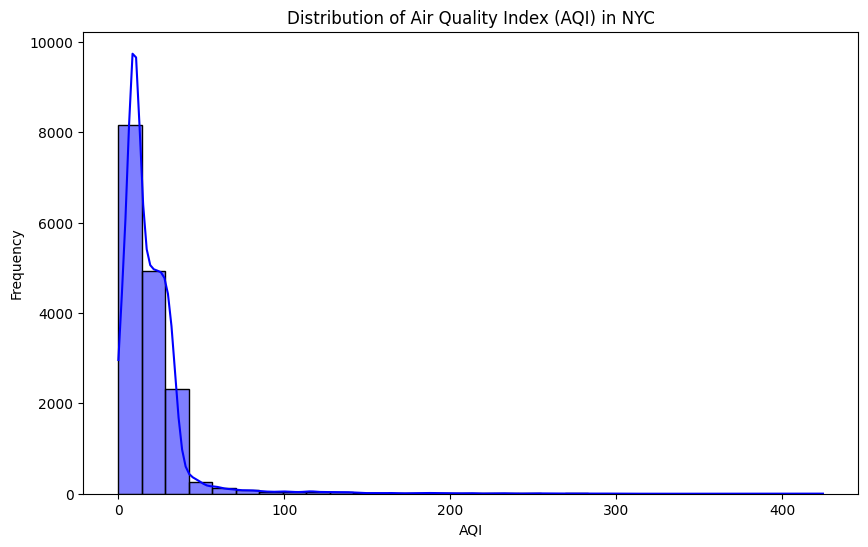

In [58]:
# Plotting distribution of Air Quality Index (AQI)
plt.figure(figsize=(10, 6))
sns.histplot(nyc_air['Data Value'], kde=True, bins=30, color='blue')
plt.title('Distribution of Air Quality Index (AQI) in NYC')
plt.xlabel('AQI')
plt.ylabel('Frequency')
plt.show()

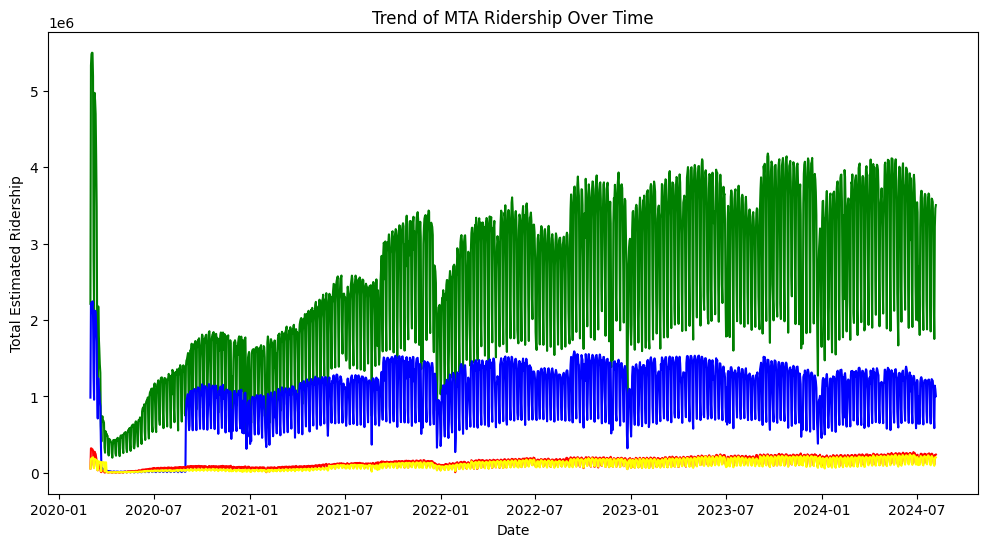

In [60]:
# Convert date column to datetime format if necessary
mta_ridership['Date'] = pd.to_datetime(mta_ridership['Date'])

# Plotting the trend of total MTA ridership over time
plt.figure(figsize=(12, 6))
plt.plot(mta_ridership['Date'], mta_ridership['Subways: Total Estimated Ridership'], color='green')
plt.plot(mta_ridership['Date'], mta_ridership['Buses: Total Estimated Ridership'], color='blue')
plt.plot(mta_ridership['Date'], mta_ridership['LIRR: Total Estimated Ridership'], color='red')
plt.plot(mta_ridership['Date'], mta_ridership['Metro-North: Total Estimated Ridership'], color='yellow')
plt.title('Trend of MTA Ridership Over Time')
plt.xlabel('Date')
plt.ylabel('Total Estimated Ridership')
plt.show()


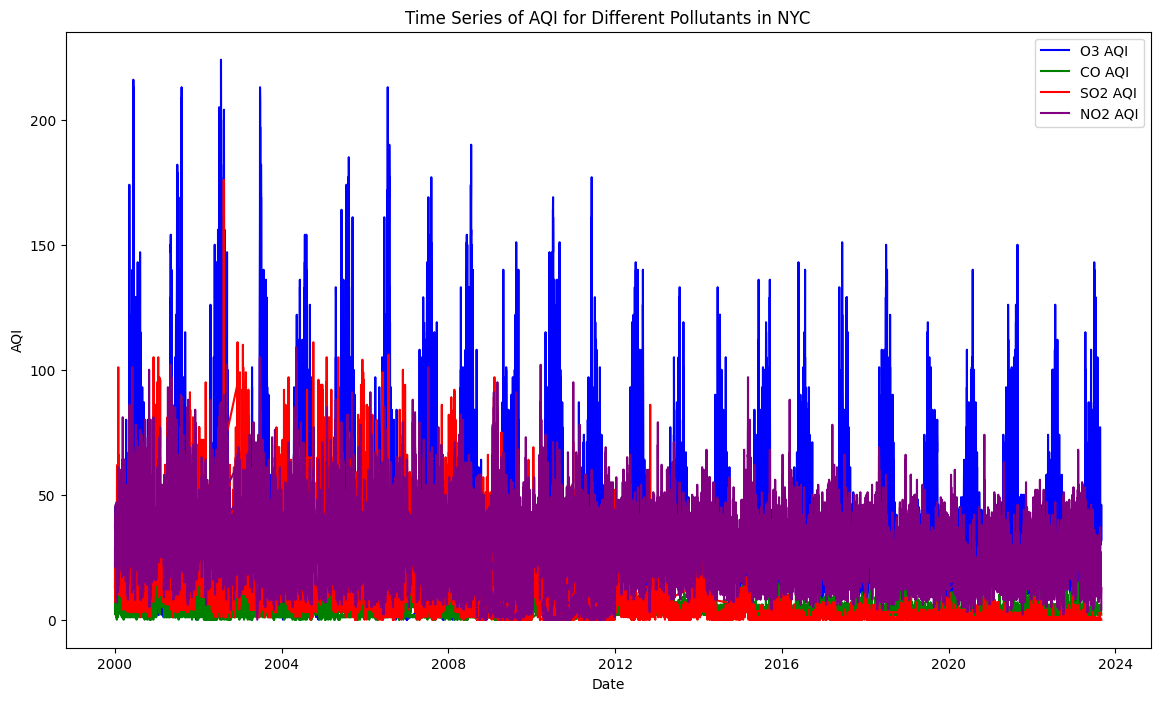

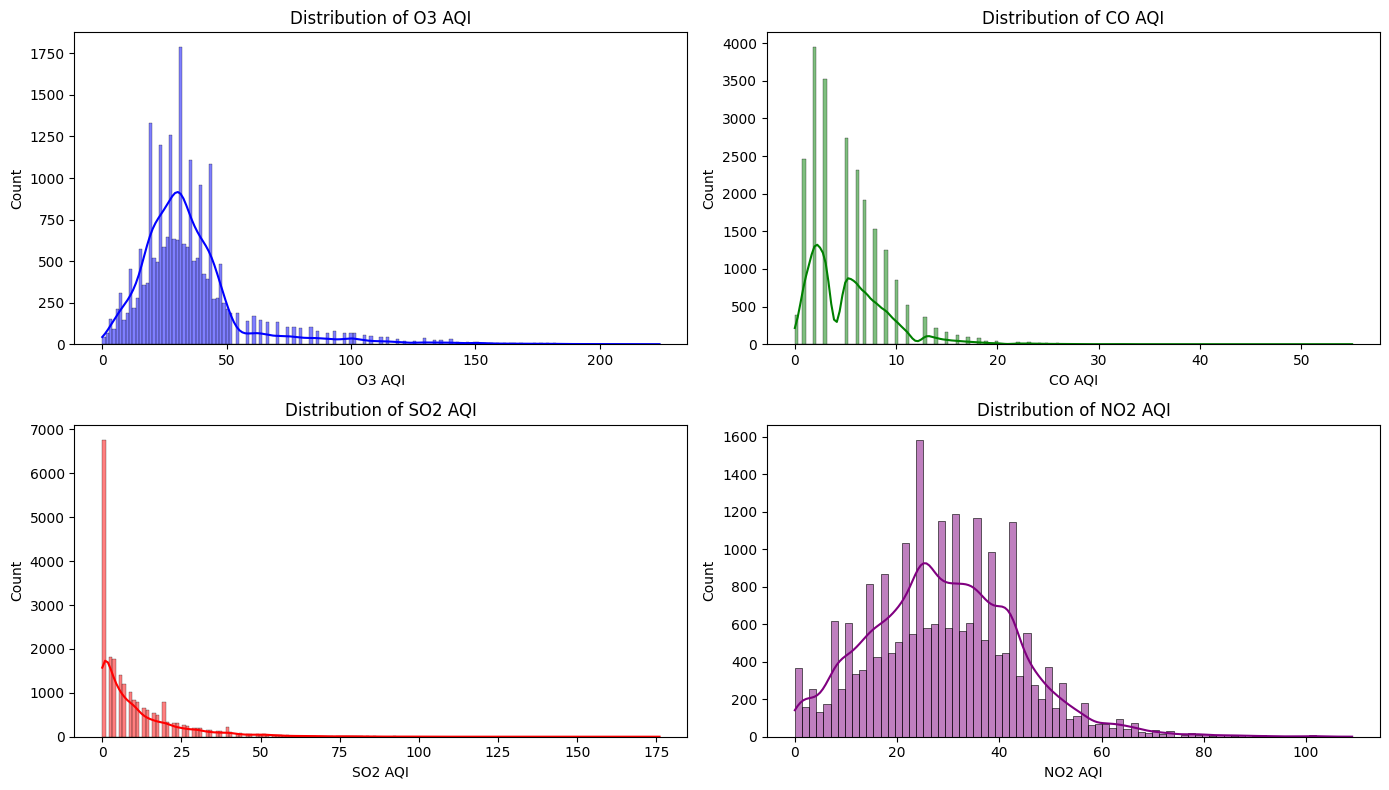

In [61]:
import matplotlib.pyplot as plt

# Plotting AQI time series for different pollutants
plt.figure(figsize=(14, 8))

plt.plot(ny_pollution['Date'], ny_pollution['O3 AQI'], label='O3 AQI', color='blue')
plt.plot(ny_pollution['Date'], ny_pollution['CO AQI'], label='CO AQI', color='green')
plt.plot(ny_pollution['Date'], ny_pollution['SO2 AQI'], label='SO2 AQI', color='red')
plt.plot(ny_pollution['Date'], ny_pollution['NO2 AQI'], label='NO2 AQI', color='purple')

plt.title('Time Series of AQI for Different Pollutants in NYC')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.legend()
plt.show()

# Plotting distribution of AQI values for each pollutant
plt.figure(figsize=(14, 8))

plt.subplot(2, 2, 1)
sns.histplot(ny_pollution['O3 AQI'], kde=True, color='blue')
plt.title('Distribution of O3 AQI')

plt.subplot(2, 2, 2)
sns.histplot(ny_pollution['CO AQI'], kde=True, color='green')
plt.title('Distribution of CO AQI')

plt.subplot(2, 2, 3)
sns.histplot(ny_pollution['SO2 AQI'], kde=True, color='red')
plt.title('Distribution of SO2 AQI')

plt.subplot(2, 2, 4)
sns.histplot(ny_pollution['NO2 AQI'], kde=True, color='purple')
plt.title('Distribution of NO2 AQI')

plt.tight_layout()
plt.show()



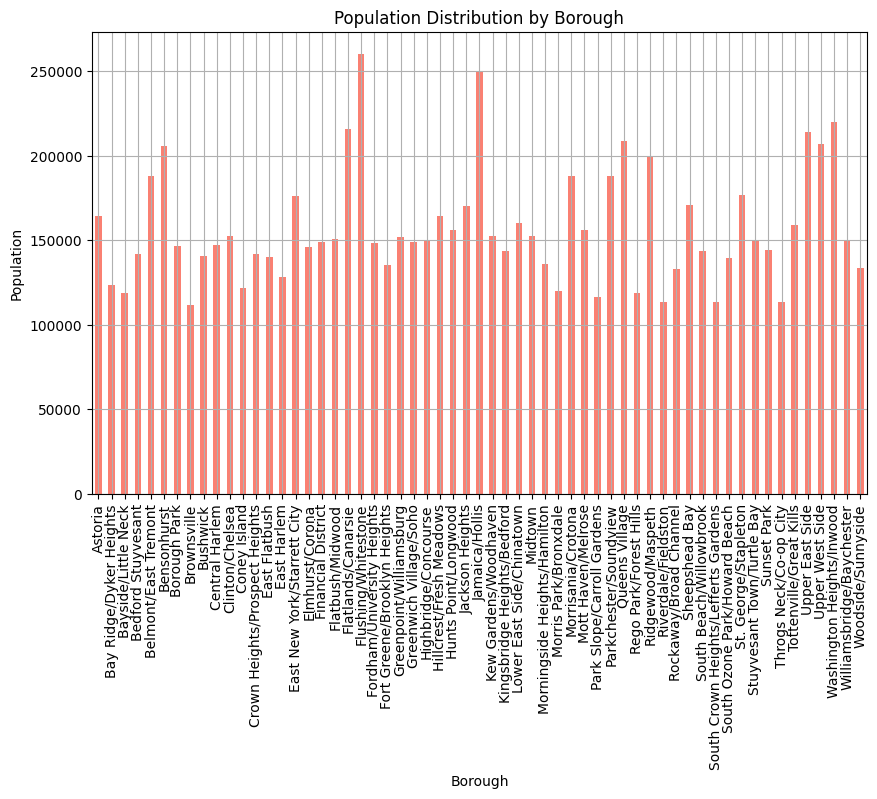

In [54]:
plt.figure(figsize=(10, 6))
ny_census.groupby('Neighborhood')['Population'].sum().plot(kind='bar', color='salmon')
plt.title('Population Distribution by Borough')
plt.xlabel('Borough')
plt.ylabel('Population')
plt.grid(True)
plt.show()

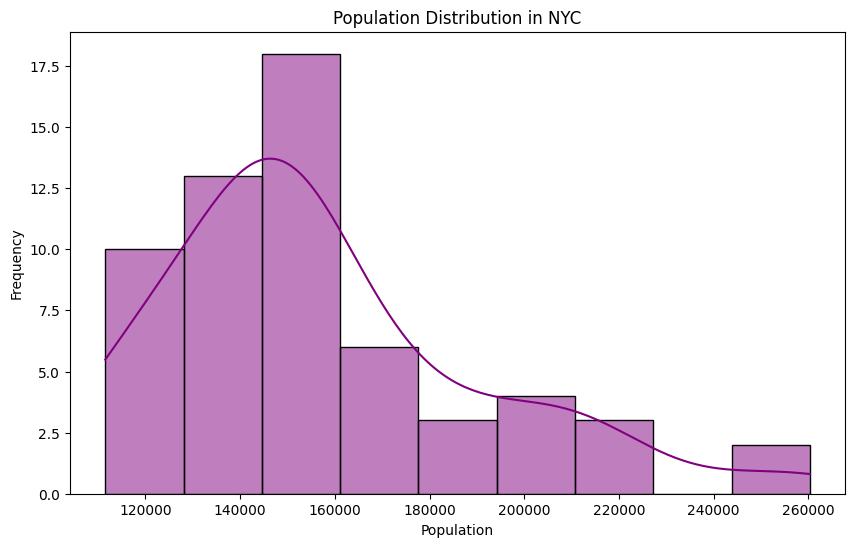

In [62]:
# Assuming the census data has a 'Population' column
plt.figure(figsize=(10, 6))
sns.histplot(ny_census['Population'], kde=True, color='purple')
plt.title('Population Distribution in NYC')
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.show()

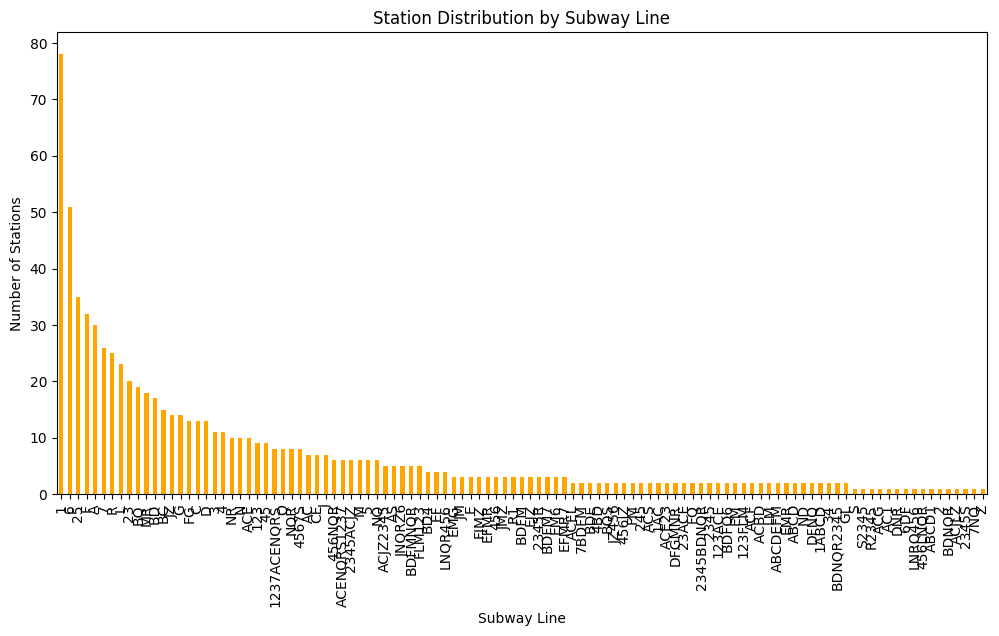

In [63]:
# Count the number of stations by line
station_counts = ny_stations['line_name'].value_counts()

# Plotting the station distribution by line
plt.figure(figsize=(12, 6))
station_counts.plot(kind='bar', color='orange')
plt.title('Station Distribution by Subway Line')
plt.xlabel('Subway Line')
plt.ylabel('Number of Stations')
plt.show()


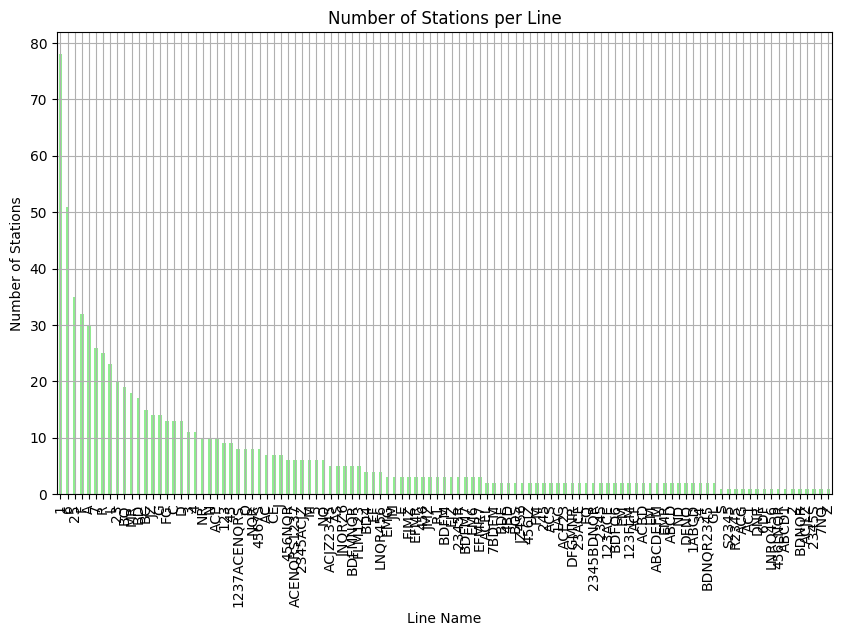

In [55]:
plt.figure(figsize=(10, 6))
ny_stations['line_name'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Number of Stations per Line')
plt.xlabel('Line Name')
plt.ylabel('Number of Stations')
plt.grid(True)
plt.show()

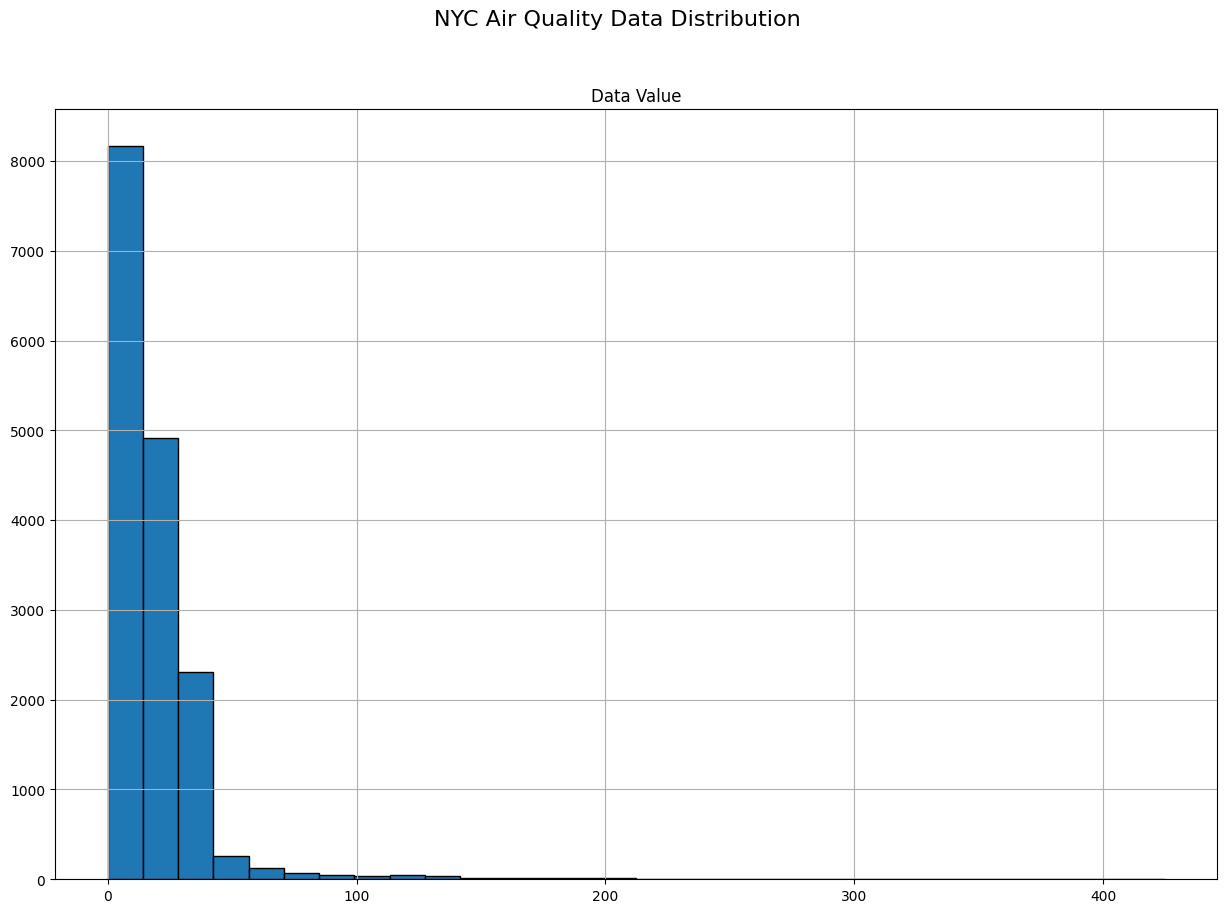

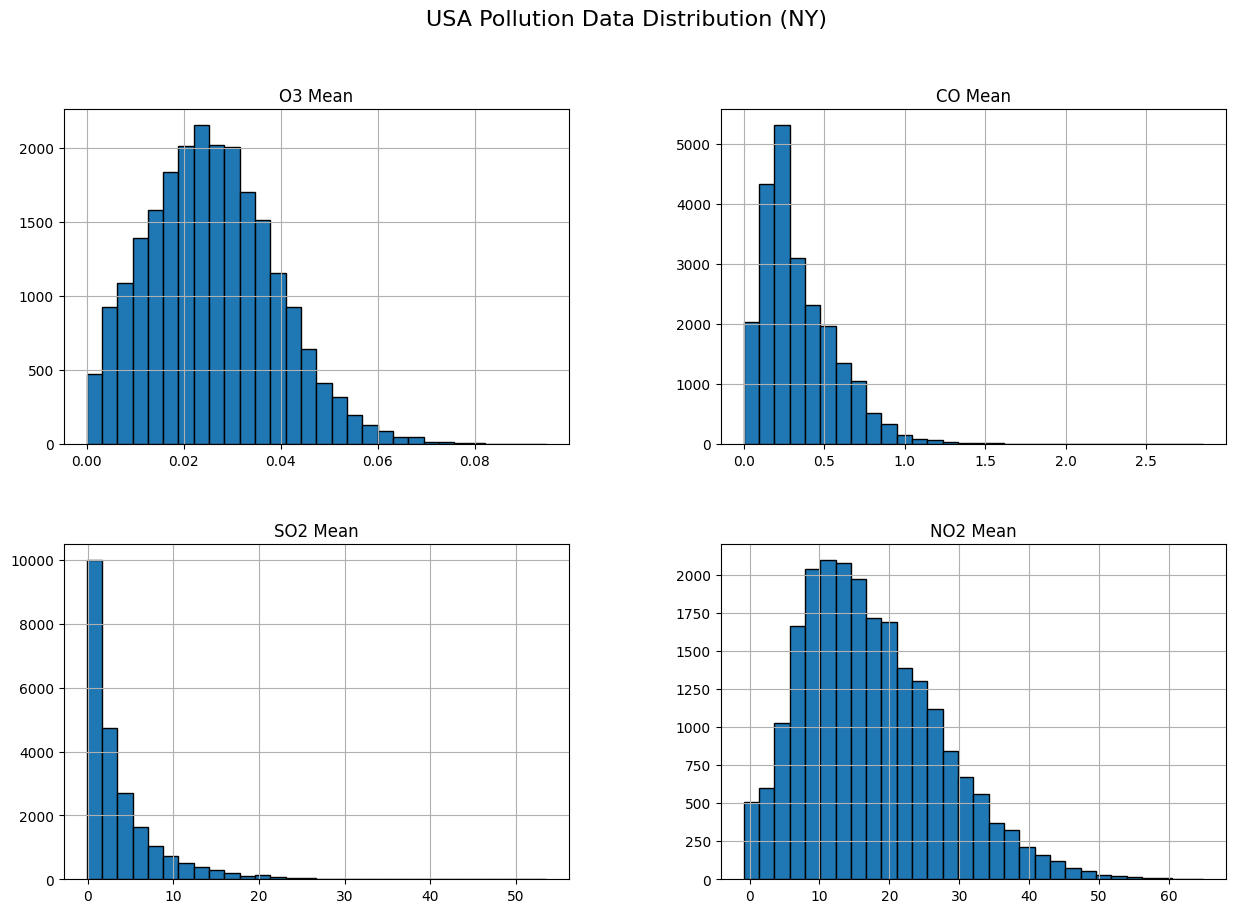

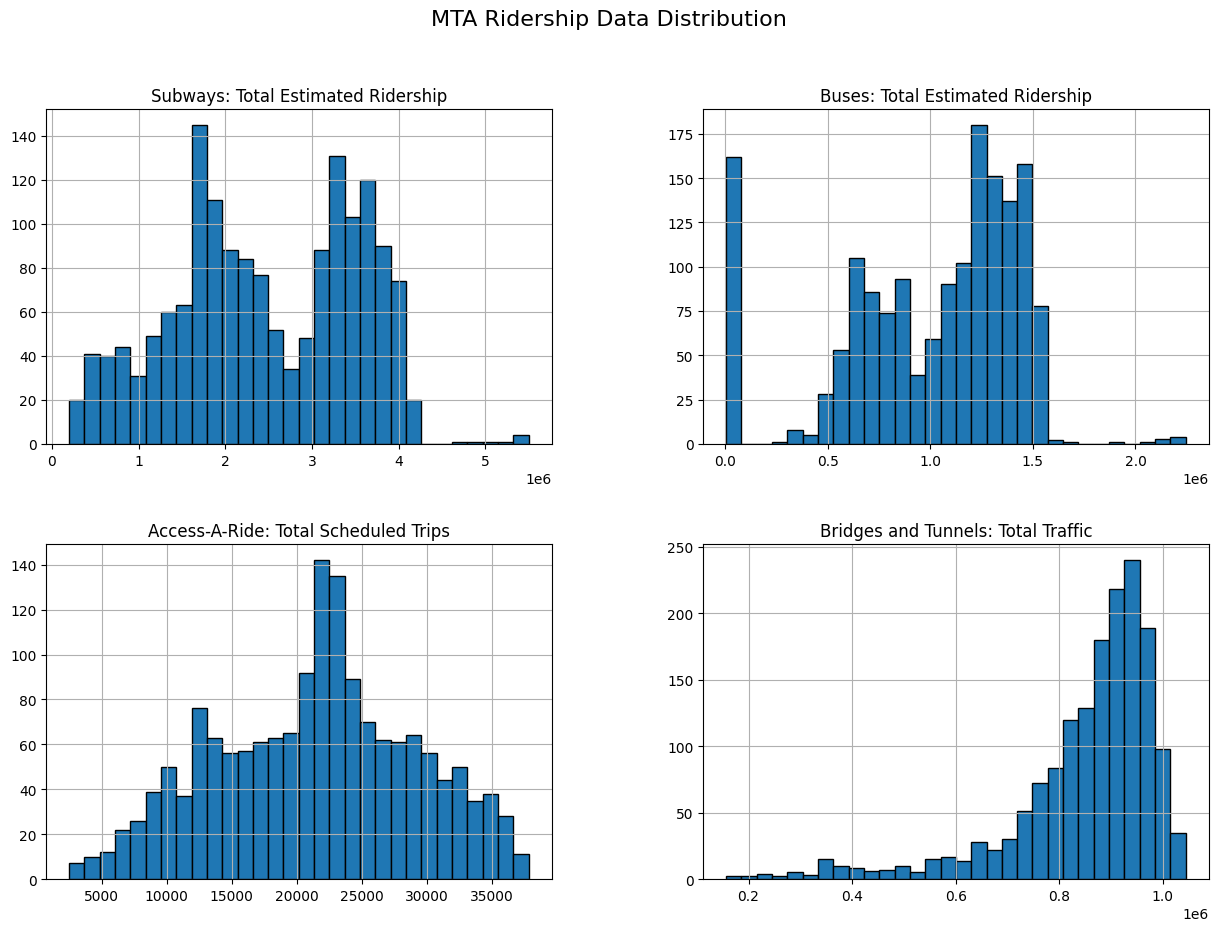

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot distributions
def plot_distributions(df, cols, title):
    df[cols].hist(figsize=(15, 10), bins=30, edgecolor='black')
    plt.suptitle(title, fontsize=16)
    plt.show()

# Visualize distribution of key variables in each dataset

# NYC Air dataset
plot_distributions(nyc_air, ['Data Value'], "NYC Air Quality Data Distribution")

# USA Pollution dataset
pollution_columns = ['O3 Mean', 'CO Mean', 'SO2 Mean', 'NO2 Mean']
plot_distributions(ny_pollution, pollution_columns, "USA Pollution Data Distribution (NY)")

# MTA Ridership dataset
ridership_columns = [
    'Subways: Total Estimated Ridership',
    'Buses: Total Estimated Ridership',
    'Access-A-Ride: Total Scheduled Trips',
    'Bridges and Tunnels: Total Traffic'
]
plot_distributions(mta_ridership, ridership_columns, "MTA Ridership Data Distribution")


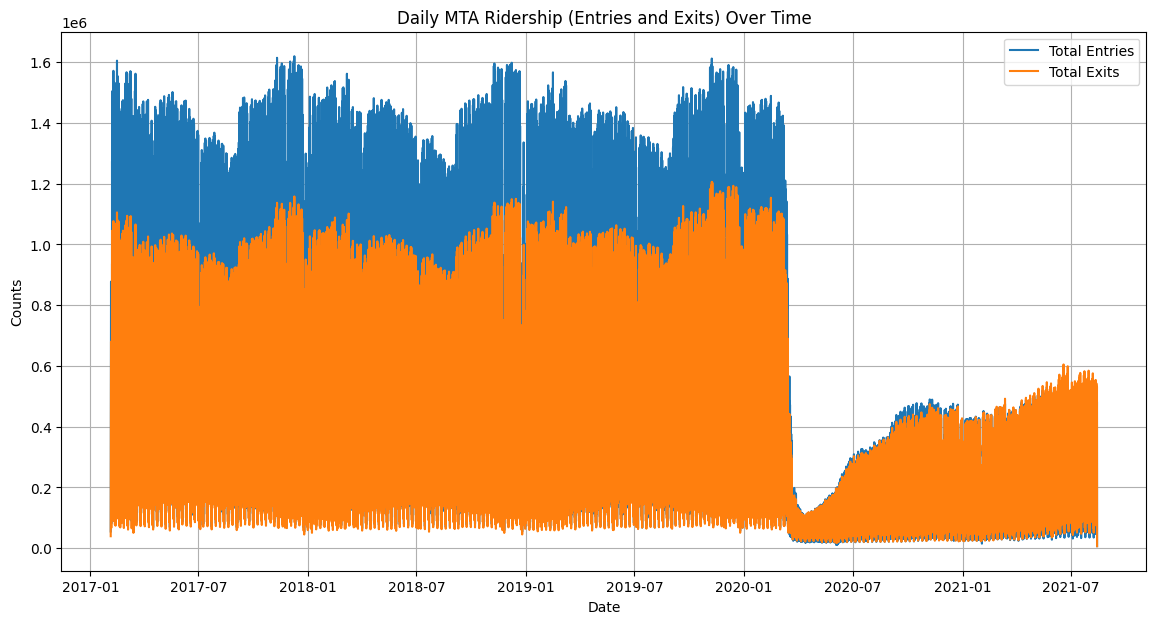

In [36]:
# Convert DATE column in the ny_subway dataset to datetime for time series analysis
ny_subway['Datetime'] = pd.to_datetime(ny_subway['Datetime'])

# Aggregate the data by date to get total entries and exits for each day
daily_ridership = ny_subway.groupby('Datetime').agg({'Entries': 'sum', 'Exits': 'sum'}).reset_index()

# Plot the time series data for entries and exits
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(daily_ridership['Datetime'], daily_ridership['Entries'], label='Total Entries')
plt.plot(daily_ridership['Datetime'], daily_ridership['Exits'], label='Total Exits')
plt.title('Daily MTA Ridership (Entries and Exits) Over Time')
plt.xlabel('Date')
plt.ylabel('Counts')
plt.legend()
plt.grid(True)
plt.show()


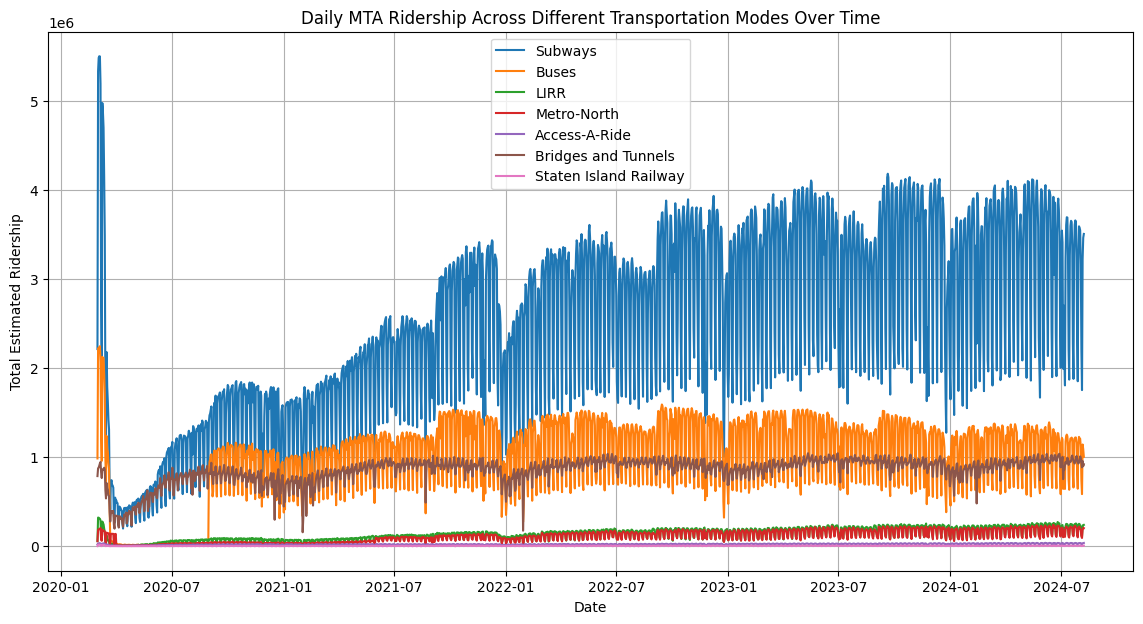

In [37]:
# Convert the 'Date' column to datetime format
mta_ridership['Date'] = pd.to_datetime(mta_ridership['Date'])

# Aggregate the data by date to get total ridership for each day
daily_ridership = mta_ridership.groupby('Date').agg({
    'Subways: Total Estimated Ridership': 'sum',
    'Buses: Total Estimated Ridership': 'sum',
    'LIRR: Total Estimated Ridership': 'sum',
    'Metro-North: Total Estimated Ridership': 'sum',
    'Access-A-Ride: Total Scheduled Trips': 'sum',
    'Bridges and Tunnels: Total Traffic': 'sum',
    'Staten Island Railway: Total Estimated Ridership': 'sum'
}).reset_index()

# Plot the time series data for the total estimated ridership of different transportation modes
plt.figure(figsize=(14, 7))
plt.plot(daily_ridership['Date'], daily_ridership['Subways: Total Estimated Ridership'], label='Subways')
plt.plot(daily_ridership['Date'], daily_ridership['Buses: Total Estimated Ridership'], label='Buses')
plt.plot(daily_ridership['Date'], daily_ridership['LIRR: Total Estimated Ridership'], label='LIRR')
plt.plot(daily_ridership['Date'], daily_ridership['Metro-North: Total Estimated Ridership'], label='Metro-North')
plt.plot(daily_ridership['Date'], daily_ridership['Access-A-Ride: Total Scheduled Trips'], label='Access-A-Ride')
plt.plot(daily_ridership['Date'], daily_ridership['Bridges and Tunnels: Total Traffic'], label='Bridges and Tunnels')
plt.plot(daily_ridership['Date'], daily_ridership['Staten Island Railway: Total Estimated Ridership'], label='Staten Island Railway')
plt.title('Daily MTA Ridership Across Different Transportation Modes Over Time')
plt.xlabel('Date')
plt.ylabel('Total Estimated Ridership')
plt.legend()
plt.grid(True)
plt.show()


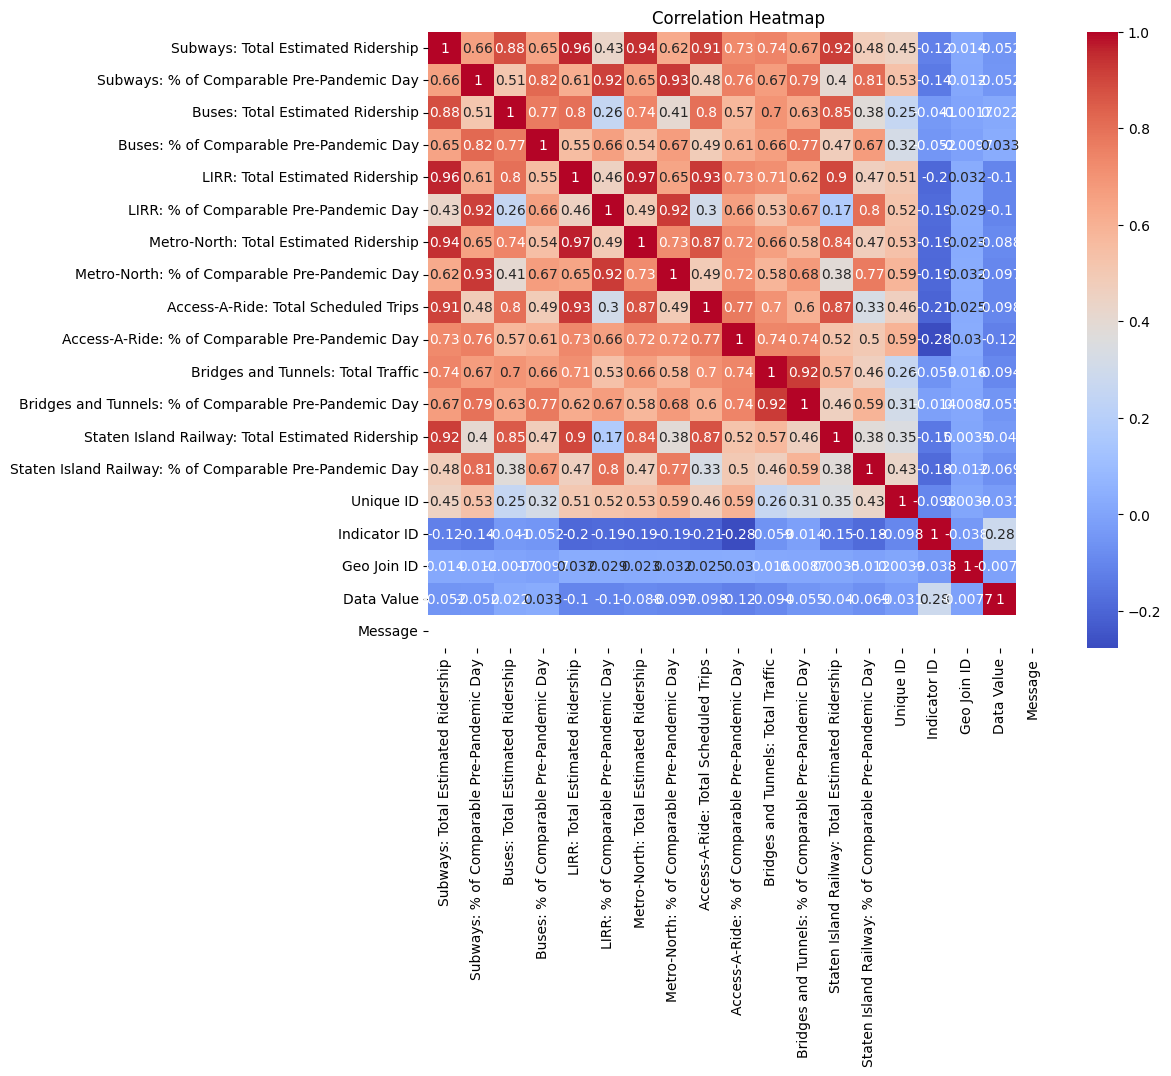

In [30]:
# MTA Ridership and NYC Air Quality:

# Assuming 'mta_ridership' and 'nyc_air' have relevant numeric columns:
mta_numeric = mta_ridership.select_dtypes(include=['float', 'int'])
air_numeric = nyc_air.select_dtypes(include=['float', 'int'])

# Combine relevant columns (adjust as needed):
combined_data = pd.concat([mta_numeric, air_numeric], axis=1)

# Calculate correlation matrix:
correlation_matrix = combined_data.corr()

# Create heatmap:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [64]:
ny_pollution['County'].unique()

array(['Bronx', 'Queens', 'Suffolk', 'Steuben', 'Monroe'], dtype=object)

In [65]:
# Filtering the dataset to include only Bronx and Queens
ny_pollution_boroughs = ny_pollution[ny_pollution['County'].isin(['Bronx', 'Queens'])]

# Calculating the mean AQI by borough for each pollutant
mean_aqi_by_borough = ny_pollution_boroughs.groupby('County').agg({
    'O3 AQI': 'mean',
    'CO AQI': 'mean',
    'SO2 AQI': 'mean',
    'NO2 AQI': 'mean'
}).reset_index()

mean_aqi_by_borough



,County,O3 AQI,CO AQI,SO2 AQI,NO2 AQI
0,Bronx,31.890043,6.796090,12.356872,32.098839
1,Queens,33.295386,5.601322,9.509042,32.900417


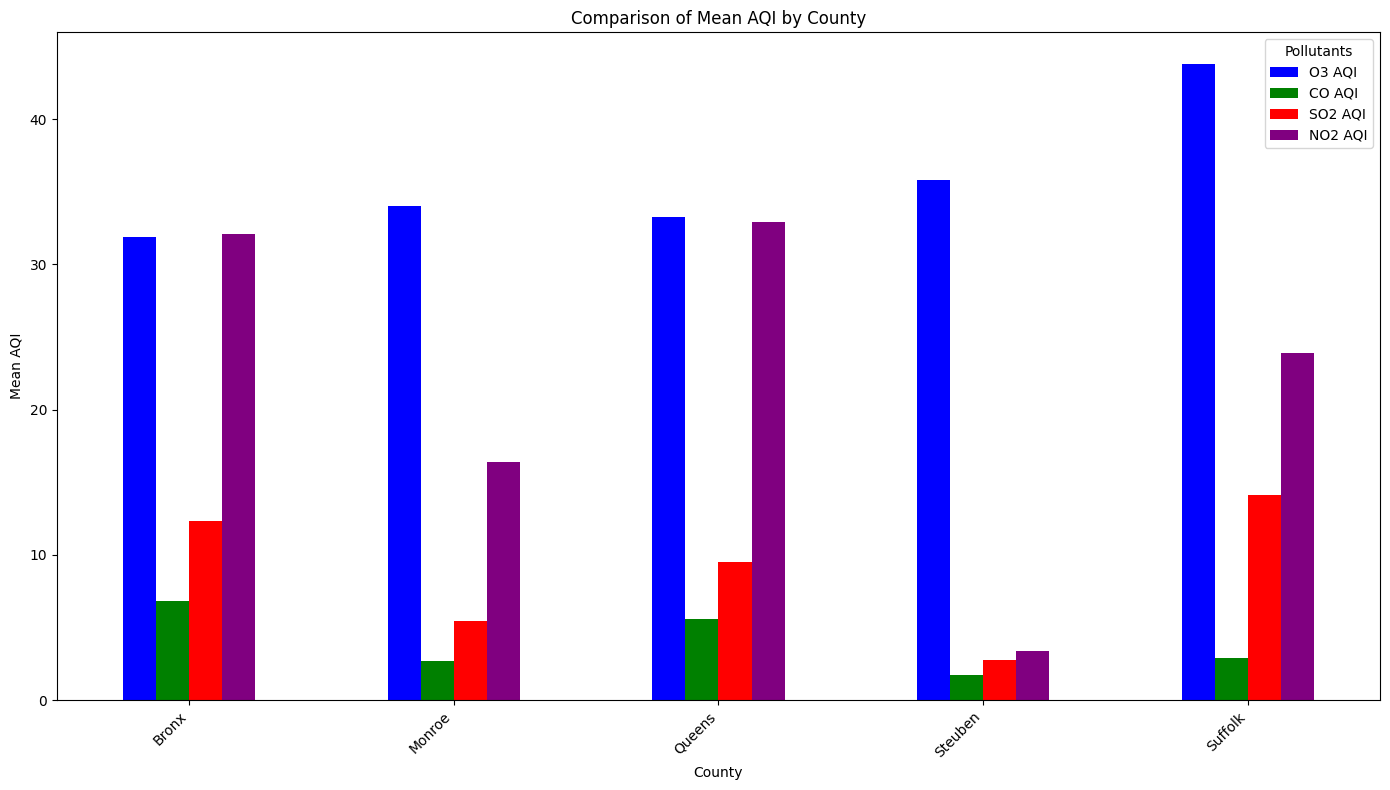

In [68]:
# Calculating the mean AQI by all counties for each pollutant
mean_aqi_all_counties = ny_pollution.groupby('County').agg({
    'O3 AQI': 'mean',
    'CO AQI': 'mean',
    'SO2 AQI': 'mean',
    'NO2 AQI': 'mean'
}).reset_index()

# Creating bar plots to compare AQI by all counties for each pollutant
mean_aqi_all_counties.set_index('County').plot(kind='bar', figsize=(14, 8), color=['blue', 'green', 'red', 'purple'])

plt.title('Comparison of Mean AQI by County')
plt.xlabel('County')
plt.ylabel('Mean AQI')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Pollutants')
plt.tight_layout()
plt.show()


In [71]:
# Renaming columns for easier merging and clarity
ny_census_df = ny_census.rename(columns={
    'Neighborhood': 'County',
    'Population density (1,000 persons per square mile)': 'Population Density'
})

# Aggregating the pollution data by county
pollution_by_county = ny_pollution.groupby('County').agg({
    'O3 AQI': 'mean',
    'CO AQI': 'mean',
    'SO2 AQI': 'mean',
    'NO2 AQI': 'mean'
}).reset_index()

# Merging the population density data with pollution data
merged_df = pd.merge(pollution_by_county, ny_census_df[['County', 'Population Density']], on='County', how='inner')

merged_df[['County', 'Population Density', 'O3 AQI', 'CO AQI', 'SO2 AQI', 'NO2 AQI']]


,County,Population Density,O3 AQI,CO AQI,SO2 AQI,NO2 AQI


In [77]:
# Checking unique values in the County columns of both datasets
pollution_counties = pollution_by_county['County'].unique()
census_counties = ny_census_df['County'].unique()

pollution_counties, census_counties


(array(['Bronx', 'Monroe', 'Queens', 'Steuben', 'Suffolk'], dtype=object),
 array(['Kings', 'Bronx', 'New York', 'Queens', 'Richmond'], dtype=object))

In [78]:
# Checking unique neighborhood names in the ny_census dataset to verify the mapping
ny_census_neighborhoods = ny_census_df['County'].unique()
ny_census_neighborhoods


array(['Kings', 'Bronx', 'New York', 'Queens', 'Richmond'], dtype=object)

In [79]:
# Creating a direct mapping for county names to boroughs
county_to_borough = {
    'Kings': 'Brooklyn',
    'Bronx': 'Bronx',
    'New York': 'Manhattan',
    'Queens': 'Queens',
    'Richmond': 'Staten Island'
}

# Applying the mapping to create a new 'Borough' column
ny_census_df['Borough'] = ny_census_df['County'].map(county_to_borough)

# Aggregating the population density by borough
borough_population_density = ny_census_df.groupby('Borough')['Population Density'].mean().reset_index()

borough_population_density


,Borough,Population Density
0,Bronx,46.341667
1,Brooklyn,43.800000
2,Manhattan,73.183333
3,Queens,26.142857
4,Staten Island,8.800000


In [80]:
# Merging the population density data with the aggregated pollution data
pollution_by_borough = pollution_by_county.rename(columns={'County': 'Borough'})
merged_data = pd.merge(pollution_by_borough, borough_population_density, on='Borough', how='inner')

# Displaying the merged data
merged_data


,Borough,O3 AQI,CO AQI,SO2 AQI,NO2 AQI,Population Density
0,Bronx,31.890043,6.796090,12.356872,32.098839,46.341667
1,Queens,33.295386,5.601322,9.509042,32.900417,26.142857


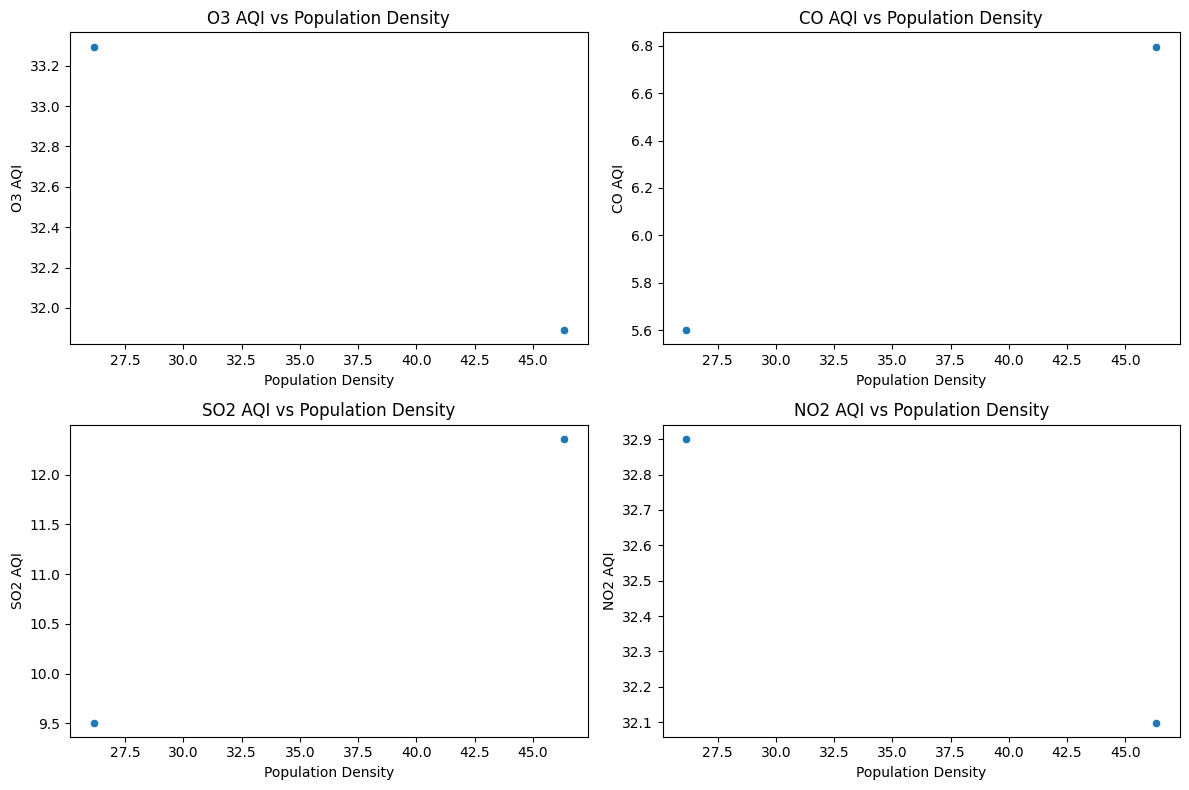

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creating scatter plots to visualize the relationship between Population Density and AQI for different pollutants
plt.figure(figsize=(12, 8))

# O3 AQI vs Population Density
plt.subplot(2, 2, 1)
sns.scatterplot(x='Population Density', y='O3 AQI', data=merged_data)
plt.title('O3 AQI vs Population Density')

# CO AQI vs Population Density
plt.subplot(2, 2, 2)
sns.scatterplot(x='Population Density', y='CO AQI', data=merged_data)
plt.title('CO AQI vs Population Density')

# SO2 AQI vs Population Density
plt.subplot(2, 2, 3)
sns.scatterplot(x='Population Density', y='SO2 AQI', data=merged_data)
plt.title('SO2 AQI vs Population Density')

# NO2 AQI vs Population Density
plt.subplot(2, 2, 4)
sns.scatterplot(x='Population Density', y='NO2 AQI', data=merged_data)
plt.title('NO2 AQI vs Population Density')

plt.tight_layout()
plt.show()


In [82]:
# Calculating correlation coefficients between Population Density and each pollutant's AQI
correlation_matrix = merged_data[['Population Density', 'O3 AQI', 'CO AQI', 'SO2 AQI', 'NO2 AQI']].corr()

correlation_matrix



,Population Density,O3 AQI,CO AQI,SO2 AQI,NO2 AQI
Population Density,1.0,-1.0,1.0,1.0,-1.0
O3 AQI,-1.0,1.0,-1.0,-1.0,1.0
CO AQI,1.0,-1.0,1.0,1.0,-1.0
SO2 AQI,1.0,-1.0,1.0,1.0,-1.0
NO2 AQI,-1.0,1.0,-1.0,-1.0,1.0


In [87]:
daily_aqi = ny_pollution.groupby('Date').agg({
    'O3 AQI': 'mean',
    'CO AQI': 'mean',
    'SO2 AQI': 'mean',
    'NO2 AQI': 'mean'
}).reset_index()

In [88]:

# Creating a combined metric for total estimated ridership across all modes
mta_ridership['Total Estimated Ridership'] = (
    mta_ridership['Subways: Total Estimated Ridership'] +
    mta_ridership['Buses: Total Estimated Ridership'] +
    mta_ridership['LIRR: Total Estimated Ridership'] +
    mta_ridership['Metro-North: Total Estimated Ridership'] +
    mta_ridership['Staten Island Railway: Total Estimated Ridership']
)

# Merging the daily AQI data with the MTA ridership data based on the date
merged_ridership_aqi = pd.merge(mta_ridership, daily_aqi, on='Date', how='inner')

# Displaying the merged data to check alignment
merged_ridership_aqi[['Date', 'Total Estimated Ridership', 'O3 AQI', 'CO AQI', 'SO2 AQI', 'NO2 AQI']].head()


,Date,Total Estimated Ridership,O3 AQI,CO AQI,SO2 AQI,NO2 AQI
0,2020-03-01,3313340.0,36.5,3.0,2.0,43.5
1,2020-03-02,8058392.0,32.0,5.0,0.5,47.5
2,2020-03-03,8237539.0,27.5,5.0,1.5,32.5
3,2020-03-04,8197461.0,35.0,3.0,0.0,17.0
4,2020-03-05,8260155.0,30.5,2.0,1.5,20.0


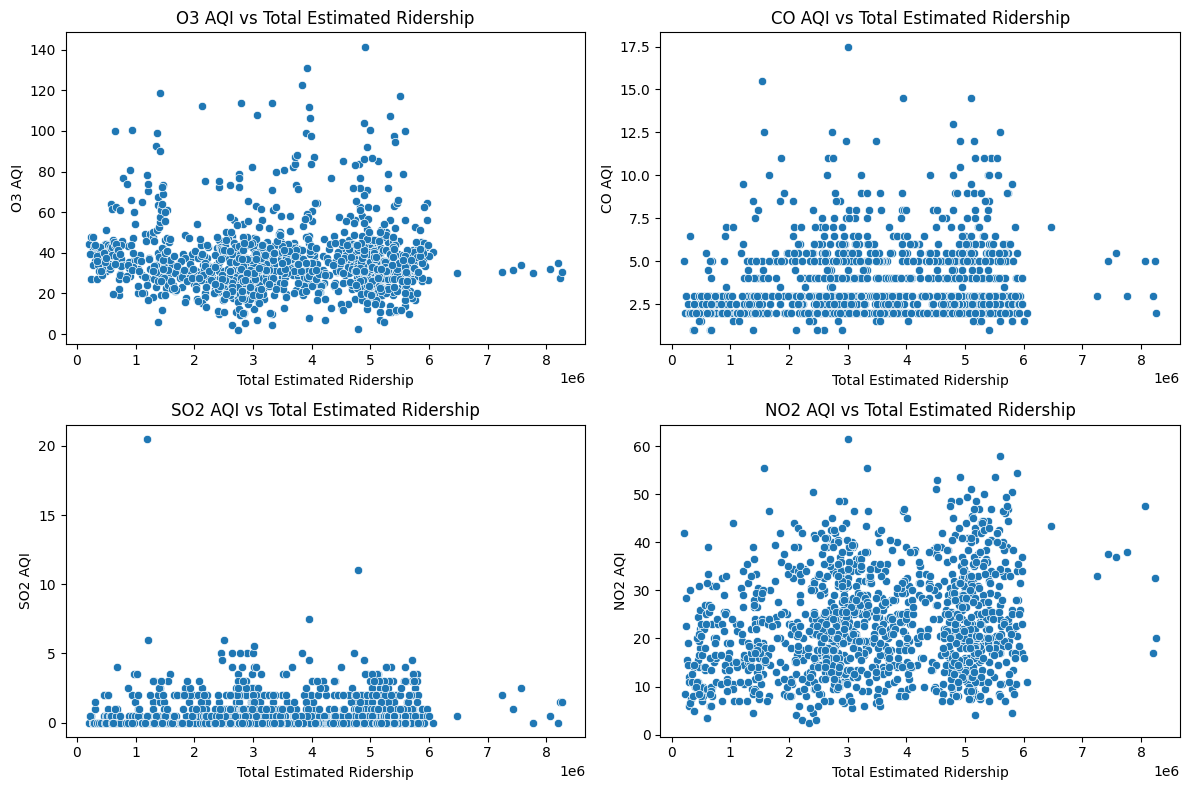

In [89]:
# Creating scatter plots to visualize the relationship between MTA Ridership and AQI for different pollutants
plt.figure(figsize=(12, 8))

# O3 AQI vs Total Estimated Ridership
plt.subplot(2, 2, 1)
sns.scatterplot(x='Total Estimated Ridership', y='O3 AQI', data=merged_ridership_aqi)
plt.title('O3 AQI vs Total Estimated Ridership')

# CO AQI vs Total Estimated Ridership
plt.subplot(2, 2, 2)
sns.scatterplot(x='Total Estimated Ridership', y='CO AQI', data=merged_ridership_aqi)
plt.title('CO AQI vs Total Estimated Ridership')

# SO2 AQI vs Total Estimated Ridership
plt.subplot(2, 2, 3)
sns.scatterplot(x='Total Estimated Ridership', y='SO2 AQI', data=merged_ridership_aqi)
plt.title('SO2 AQI vs Total Estimated Ridership')

# NO2 AQI vs Total Estimated Ridership
plt.subplot(2, 2, 4)
sns.scatterplot(x='Total Estimated Ridership', y='NO2 AQI', data=merged_ridership_aqi)
plt.title('NO2 AQI vs Total Estimated Ridership')

plt.tight_layout()
plt.show()


In [91]:
# Calculating correlation coefficients between Total Estimated Ridership and each pollutant's AQI
ridership_aqi_correlation = merged_ridership_aqi[['Total Estimated Ridership', 'O3 AQI', 'CO AQI', 'SO2 AQI', 'NO2 AQI']].corr()

ridership_aqi_correlation


,Total Estimated Ridership,O3 AQI,CO AQI,SO2 AQI,NO2 AQI
Total Estimated Ridership,1.000000,-0.029042,0.145991,0.056768,0.231983
O3 AQI,-0.029042,1.000000,-0.046482,-0.177134,-0.027464
CO AQI,0.145991,-0.046482,1.000000,0.287977,0.663039
SO2 AQI,0.056768,-0.177134,0.287977,1.000000,0.354442
NO2 AQI,0.231983,-0.027464,0.663039,0.354442,1.000000


,Total Estimated Ridership,O3 AQI,CO AQI,SO2 AQI,NO2 AQI
Total Estimated Ridership,1.000000,-0.029042,0.145991,0.056768,0.231983
O3 AQI,-0.029042,1.000000,-0.046482,-0.177134,-0.027464
CO AQI,0.145991,-0.046482,1.000000,0.287977,0.663039
SO2 AQI,0.056768,-0.177134,0.287977,1.000000,0.354442
NO2 AQI,0.231983,-0.027464,0.663039,0.354442,1.000000


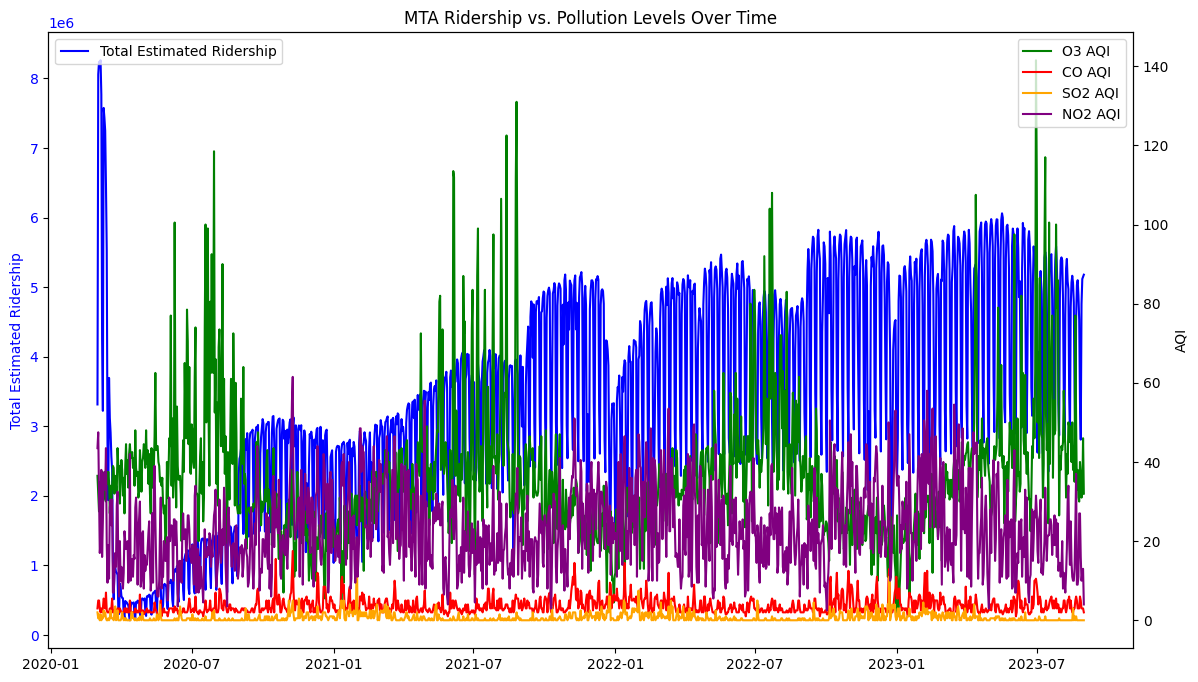

In [93]:
# Creating a combined line plot with two y-axes to show ridership and pollution levels over time
plt.figure(figsize=(14, 8))

# Plotting the ridership on the left y-axis
ax1 = plt.gca()
ax1.plot(merged_ridership_aqi['Date'], merged_ridership_aqi['Total Estimated Ridership'], color='blue', label='Total Estimated Ridership')
ax1.set_ylabel('Total Estimated Ridership', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Plotting the O3 AQI on the right y-axis
ax2 = ax1.twinx()
ax2.plot(merged_ridership_aqi['Date'], merged_ridership_aqi['O3 AQI'], color='green', label='O3 AQI')
ax2.plot(merged_ridership_aqi['Date'], merged_ridership_aqi['CO AQI'], color='red', label='CO AQI')
ax2.plot(merged_ridership_aqi['Date'], merged_ridership_aqi['SO2 AQI'], color='orange', label='SO2 AQI')
ax2.plot(merged_ridership_aqi['Date'], merged_ridership_aqi['NO2 AQI'], color='purple', label='NO2 AQI')
ax2.set_ylabel('AQI', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Adding title and legends
plt.title('MTA Ridership vs. Pollution Levels Over Time')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()
